# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
#TODO: visualization

# Load pickled data
import pickle

training_file = './data/train.p'
validation_file='./data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np 

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

labls,lblFreqs=np.unique(y_train,return_counts=True)
numLabels=len(labls)
print("Number of training examples =", len(X_train))
print("Number of testing examples =", len(X_test))
print("Number of validation examples =", len(X_valid))
print("Image data shape =", X_train[0].shape)
print("Number of labels =",numLabels)
print("Least number of examples for a label = ",lblFreqs.min())
print(y_train.shape)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of labels = 43
Least number of examples for a label =  180
(34799,)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

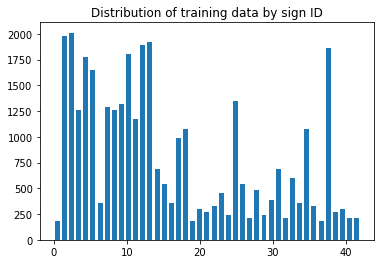

28


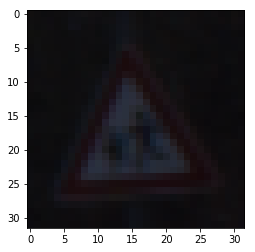

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#Show distribution of training data by sign type(y_train)
hist,bins=np.histogram(y_train,bins=numLabels)
#hist,bins=lblFreqs,labls.astype('float64')#Why doesn't this work all types are same for hist, cente, and width like this but plt.bar gives error

width = 0.7*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Distribution of training data by sign ID")
plt.show()

#Look at random image and its label
ind=np.random.randint(0,len(X_train)-1)

plt.figure()
plt.imshow(X_train[ind].squeeze())

print(y_train[ind])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
#converting to grayscale(method used is average of RGB values)
print(X_train[0][0][0])
X_train=np.mean(X_train,axis=3,keepdims=True)
print(X_train[0][0][0])
X_valid=np.mean(X_valid,axis=3,keepdims=True)
X_test=np.mean(X_test,axis=3,keepdims=True)

[28 25 24]
[25.66666667]


In [5]:
#Normalize the data
print(X_train[0][0][0])
X_train=(X_train-128)/128
print(X_train[0][0][0])
print(np.mean(X_train))
X_valid=(X_valid-128)/128
X_test=(X_test-128)/128

print("New input data shape =", X_train[0].shape)
#Other preprocessing steps could include
#making a more uniform distribution of labels
    #(labels with less examples for make more by doing things to some examples already have of them, change brightness,rotate, etc.)

[25.66666667]
[-0.79947917]
-0.35408133564846583
New input data shape = (32, 32, 1)


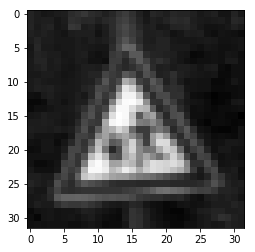

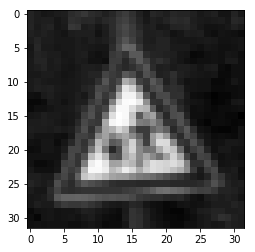

In [6]:
#Question: Should goal be to make uniform distribution of data amongst labels, 
            #or to add examples for labels with less than say 1000 examples?

#Augmenting labels with less than 1000 examples
#Only do things to images that do not change their label, 
    #so no rotations/flipping
    #(easier than checking sign type,only rotating/flipping if certain type and figuring out new label)
    
plt.figure()
plt.imshow(X_train[ind].squeeze(),cmap='gray')
def bright(im):#slight and random
    db=np.random.rand()#random amount to change every pixels brightness by make sure not 0
    return np.where((1-im)<db,1,im+db)

plt.figure()
plt.imshow(bright(X_train[ind]).squeeze(),cmap='gray')

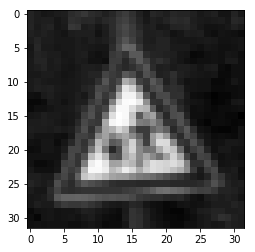

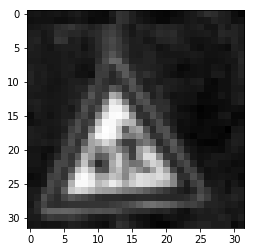

In [7]:
plt.figure()
plt.imshow(X_train[ind].squeeze(),cmap='gray')
def translate(im):#slight and random
    #get number of rows and cols to move
    ds=np.random.choice([-2,-1,1,2],2)#Make sure 0 is not chosen
    #Move the bottom ds[0] rows of pixels to top of image 
    im=np.roll(im,ds[0],axis=0)
    #Move right ds[1] columns of pixels to left of image
    return np.roll(im,ds[1],axis=1)

plt.figure()
plt.imshow(translate(X_train[ind]).squeeze(),cmap='gray')

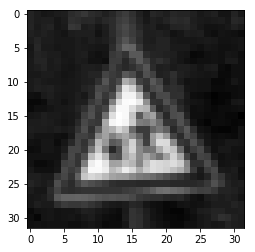

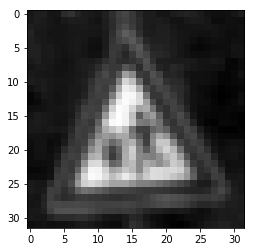

In [8]:
plt.figure()
plt.imshow(X_train[ind].squeeze(),cmap='gray')
import cv2
def resize(im):#a slight random resize
    ds=np.random.choice([1,2,3],2)
    #Four corners of the image
    dst=np.float32([[0,0],[im.shape[1],0],[im.shape[1],im.shape[0]],[0,im.shape[0]]])
    #Random four points by image corners
    src=np.float32([[ds[0],ds[1]],[im.shape[1]-ds[0],ds[1]],[im.shape[1]-ds[0],im.shape[0]-ds[1]],[ds[0],im.shape[0]-ds[1]]])
    #Warp
    im=cv2.warpPerspective(im,cv2.getPerspectiveTransform(src,dst),(im.shape[1],im.shape[0]),flags=cv2.INTER_LINEAR)
    return im[:,:,np.newaxis]

plt.figure()
plt.imshow(resize(X_train[ind]).squeeze(),cmap='gray')

(32, 32, 1)


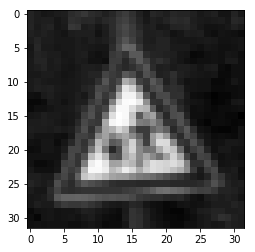

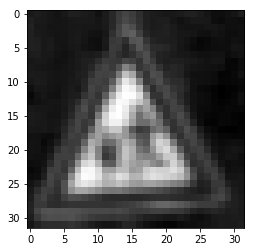

In [9]:
plt.figure()
plt.imshow(X_train[ind].squeeze(),cmap='gray')
def warp(im):#a slight random warp
    ds=np.random.choice([1,2,3],8)
    #Four corners of the image
    dst=np.float32([[0,0],[im.shape[1],0],[im.shape[1],im.shape[0]],[0,im.shape[0]]])
    #Random four points by image corners
    src=np.float32([[ds[0],ds[1]],[im.shape[1]-ds[2],ds[3]],[im.shape[1]-ds[4],im.shape[0]-ds[5]],[ds[6],im.shape[0]-ds[7]]])
    #Warp
    im=cv2.warpPerspective(im,cv2.getPerspectiveTransform(src,dst),(im.shape[1],im.shape[0]),flags=cv2.INTER_LINEAR)
    return im[:,:,np.newaxis]

plt.figure()
plt.imshow(warp(X_train[ind]).squeeze(),cmap='gray')
print(X_train[0].shape)

In [10]:
#Questtion
#DId this so I could get idea of how long data augmentation would take at longest
test=lblFreqs[np.where(lblFreqs<1000)]
print("Number of labels with less than 1000 examples: ",len(test))
print("Max number new examples made: ",4*test.sum())

Number of labels with less than 1000 examples:  27
Max number new examples made:  40436


(34799, 32, 32, 1)
(34799,)
0
Start
End
6
Start
End
14
Start
End
15
Start
End
16
Start
End
17
Start
End
19
Start
End
20
Start
End
21
Start
End
22
Start
End
23
Start
End
24
Start
End
26
Start
End
27
Start
End
28
Start
End
29
Start
End
30
Start
End
31
Start
End
32
Start
End
33
Start
End
34
Start
End
36
Start
End
37
Start
End
39
Start
End
40
Start
End
41
Start
End
42
Start
End
(51419, 32, 32, 1)
(51419,)


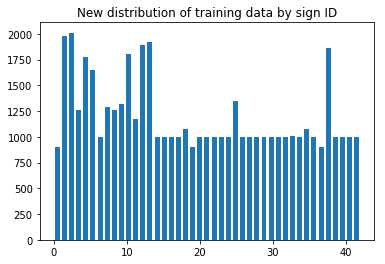

In [12]:
#WARNING DO NOT RUN THIS, IT TAKES A LONG TIME, INSTEAD RUN THE CELL AFTER THE NEXT TO LOAD DATA FROM FILE

#only use this while loop if add something to keep track of images already augmented so there are not duplicates in dataset
#while lblFreq.min()<1000:#While some label has less than 1000 examples

#(small labels(<1000) have 5x number of images after, this should make everything have, at least 900 examples)
print(X_train.shape)
print(y_train.shape)
#How to make this more efficient? Takes a while to run
'''size=len(y_train)
for i in range(size):
    if lblFreqs[y_train[i]]<1000:#If get rid of this will increase size of dataset even more(but takes loneger)
        #Add in 4 new images to training set with this label and update lblFreq accordingly
        X_train=np.append(X_train,[translate(X_train[i])],axis=0)
        y_train=np.append(y_train,[y_train[i]])
        lblFreqs[y_train[i]]+=1
        
        X_train=np.append(X_train,[resize(X_train[i])],axis=0)
        y_train=np.append(y_train,[y_train[i]])
        lblFreqs[y_train[i]]+=1
            
        X_train=np.append(X_train,[bright(X_train[i])],axis=0)
        y_train=np.append(y_train,[y_train[i]])
        lblFreqs[y_train[i]]+=1
        
        X_train=np.append(X_train,[warp(X_train[i])],axis=0)
        y_train=np.append(y_train,[y_train[i]])
        lblFreqs[y_train[i]]+=1
        '''
#print(lblFreqs.dtype)
for lbl in labls:
    if lblFreqs[lbl]<1000:
        print(lbl)
        print('Start')
        temp=X_train[np.where(y_train==lbl)]#Should be same indices
        size=len(temp)
        for i in range(size):
            if lblFreqs[lbl]<1000:
                #Add in 4 new images to training set with this label and update lblFreq accordingly
                X_train=np.append(X_train,[translate(temp[i])],axis=0)
                y_train=np.append(y_train,[lbl])
                lblFreqs[lbl]+=1
        
                X_train=np.append(X_train,[resize(temp[i])],axis=0)
                y_train=np.append(y_train,[lbl])
                lblFreqs[lbl]+=1
            
                X_train=np.append(X_train,[bright(temp[i])],axis=0)
                y_train=np.append(y_train,[lbl])
                lblFreqs[lbl]+=1
        
                X_train=np.append(X_train,[warp(temp[i])],axis=0)
                y_train=np.append(y_train,[lbl])
                lblFreqs[lbl]+=1
        print('End')
print(X_train.shape)
print(y_train.shape)
#Show new distribution of training data by sign type(y_train)
hist,bins=np.histogram(y_train,bins=numLabels)
width = 0.7*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("New distribution of training data by sign ID")
plt.show()

In [13]:
#save the augmented data(it takes a long time to generate so will just load it after 1 time running it)
augTrain={'features':X_train,'labels':y_train}
pickle.dump(augTrain,open("./data/augTrain.p","wb"))

In [11]:
#If already augmented data one time skip 2 previous cells and just load it(is quicker)
with open("./data/augTrain.p", mode='rb') as f:
    train = pickle.load(f)
X_train, y_train = train['features'], train['labels']
print(X_train.shape)
print(y_train.shape)

(51419, 32, 32, 1)
(51419,)


### Model Architecture

In [12]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

#Model based on (http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) and LeNet model
#TODO: Play with input and output shapes of hidden layers?
#TODO: A little slow to train(maybe concatenate output from con3 with output from after subsumpling con2 since it is smaller than con1's,
        #that would make input to fully connected layers about half the size and maybe make training quicker)
        #so seeing results of model architectures and hyperparams(learnrate/batchsize/etc.) wouldn't take long

def LeNetMod(x):    
    #P=1 if 'SAME' P=0 if 'VALID'
    #S=stride
    #new_height = (input_height - filter_height + 2 * P)/S + 1
    #new_width = (input_width - filter_width + 2 * P)/S + 1
    mu = 0
    sigma = 0.1
    
    weights = {
    'con1': tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma)),
    'con2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
    'con3': tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma)),
    'full1': tf.Variable(tf.truncated_normal(shape=(1576, 43), mean = mu, stddev = sigma))
    #'full2': tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma)),
    #'full3': tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    }
    
    biases = [
    tf.Variable(tf.zeros([6])),
    tf.Variable(tf.zeros([16])),
    tf.Variable(tf.zeros([400])),
    tf.Variable(tf.zeros([43])),]
    
    #tf.Variable(tf.zeros([84])),
    #tf.Variable(tf.zeros([43]))]
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    x=tf.nn.conv2d(x, weights['con1'], strides=[1, 1, 1, 1], padding='VALID')
    x = tf.nn.bias_add(x, biases[0])
    #Activation.
    x=tf.nn.relu(x)
    #Maxpooling. Input = 28x28x6. Output = 14x14x6.
    x=tf.nn.max_pool(x,ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1],padding='SAME')
    
    #Make copy of 1st layer's output to add as input into fullyconnected layers later
    l1Out=x
    
    #Layer 2: Convolutional. Output = 10x10x16.
    x=tf.nn.conv2d(x, weights['con2'], strides=[1, 1, 1, 1], padding='VALID')
    x = tf.nn.bias_add(x, biases[1])
    #Activation.
    x=tf.nn.relu(x)
    #Maxpooling. Input = 10x10x16. Output = 5x5x16.
    x=tf.nn.max_pool(x,ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1],padding='SAME')
    
    
    #Layer 3: Convolutional.(no subsampling(maxpooling)) Output = 1x1x400.
    x=tf.nn.conv2d(x, weights['con3'], strides=[1, 1, 1, 1], padding='VALID')
    x = tf.nn.bias_add(x, biases[2])
    #Activation.
    x=tf.nn.relu(x)
    
    
    #Flattten and concatenate the inputs(1176,400) for fully connected layers Output = 1576
    x=tf.concat([tf.contrib.layers.flatten(l1Out),tf.contrib.layers.flatten(x)], 1)
    
    #Dropout
    x=tf.nn.dropout(x, keepProb)
    
    #Layer 4: Fully Connected. Input = 1576. Output = 43.
    logits=tf.add(tf.matmul(x, weights['full1']),biases[3])
    '''#Activation.
    x=tf.nn.relu(x)
    
    #Drop out after fully connected layers
    x=tf.nn.dropout(x, keepProb)
    
    #Layer 5: Fully Connected. Input = 120. Output = 84.
    x=tf.add(tf.matmul(x, weights['full2']),biases[4])
    #Activation.
    x=tf.nn.relu(x)
    
    #Drop out after fully connected layers
    x=tf.nn.dropout(x, keepProb)
        
    #Layer 6: Fully Connected.(Output layer) Input = 84. Output = 43.
    logits=tf.add(tf.matmul(x, weights['full3']),biases[5])'''
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
#Question: What is a good validation accuracy for model/how many epochs should it take to reach that before you say model is not that good?

#How to allocate data during training
EPOCHS = 30
BATCH_SIZE = 128

#Placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keepProb = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

#Training pipeline
rate = 0.00095#AdamOptimize implements learning rate decay already?

logits = LeNetMod(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#Evaluate model(how well is it doing)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keepProb: 1.0})#Do not want dropout for evaluation
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
#TODO: Maybe in data augmentation make overl data more uniformly distribuited across labels
        #or maybe have batches be uniformly distibruited across labels(batch size=86, and randomly choose 2 samples from each label?)
    

#Train then save the model
from sklearn.utils import shuffle#for shuffling data order each epoch
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keepProb: .5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
### Calculate and report the accuracy on the training and validation set.

### Feel free to use as many code cells as needed.

Training...

EPOCH 1 ...
Validation Accuracy = 0.854

EPOCH 2 ...
Validation Accuracy = 0.896

EPOCH 3 ...
Validation Accuracy = 0.916

EPOCH 4 ...
Validation Accuracy = 0.937

EPOCH 5 ...
Validation Accuracy = 0.935

EPOCH 6 ...
Validation Accuracy = 0.940

EPOCH 7 ...
Validation Accuracy = 0.945

EPOCH 8 ...
Validation Accuracy = 0.944

EPOCH 9 ...
Validation Accuracy = 0.956

EPOCH 10 ...
Validation Accuracy = 0.947

EPOCH 11 ...
Validation Accuracy = 0.941

EPOCH 12 ...
Validation Accuracy = 0.954

EPOCH 13 ...
Validation Accuracy = 0.947

EPOCH 14 ...
Validation Accuracy = 0.954

EPOCH 15 ...
Validation Accuracy = 0.955

EPOCH 16 ...
Validation Accuracy = 0.965

EPOCH 17 ...
Validation Accuracy = 0.954

EPOCH 18 ...
Validation Accuracy = 0.950

EPOCH 19 ...
Validation Accuracy = 0.963

EPOCH 20 ...
Validation Accuracy = 0.952

EPOCH 21 ...
Validation Accuracy = 0.953

EPOCH 22 ...
Validation Accuracy = 0.963

EPOCH 23 ...
Validation Accuracy = 0.959

EPOCH 24 ...
Validation Accura

In [15]:
#Get accuracy on test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.953


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

11
38
12
18
25
3


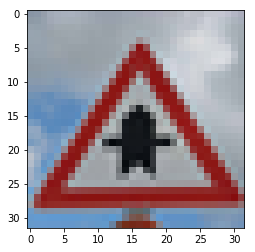

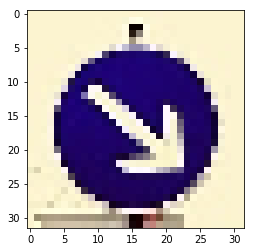

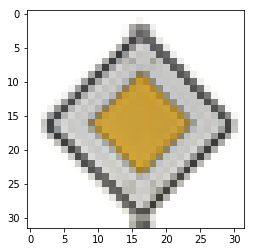

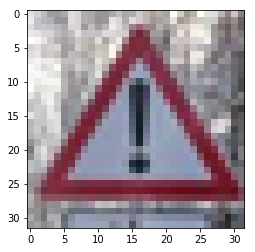

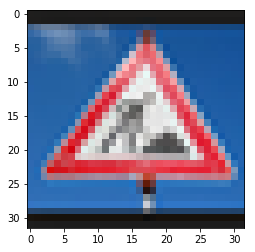

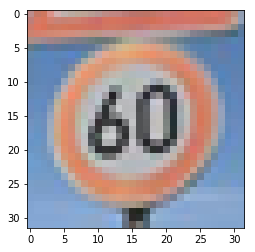

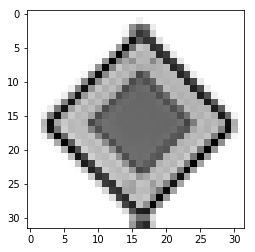

In [16]:
import os

import matplotlib.image as mpimg
filenames=os.listdir('./RoadSigns')

imgs=[]
lbls=[]

#Load images and their labels
for sig in filenames:
    absImgPath=os.path.join(os.getcwd(),'./RoadSigns',sig)
    imgs.append(cv2.cvtColor(mpimg.imread(absImgPath), cv2.COLOR_RGBA2RGB))
    lbls.append(sig[2:-4])
#Show them
for i in range(len(imgs)):
    print(lbls[i])
    plt.figure()
    plt.imshow(imgs[i].squeeze())
    
imgs=np.array(imgs)
lbls=np.array(lbls).astype('int32')
#preds=np.array(lbls.shape,dtype='int32')#will store top 5 classes predicted

#converting to grayscale(method used is average of RGB values)
imgs=np.mean(imgs,axis=3,keepdims=True)

#Normalize the images
imgs=(imgs-128)/128
plt.figure()
plt.imshow(imgs[2].squeeze(),cmap='gray')

## Predict Top 5 Sign Types for Each Image And Analyze Performance

INFO:tensorflow:Restoring parameters from ./lenet
Actual label:11
	Probabilities:[0.33748862 0.12007383 0.10291615 0.09545978 0.04683036]
	Sign IDs:[ 3  5 18 25 32]
Actual label:38
	Probabilities:[0.3476555  0.11373181 0.10545962 0.06633744 0.05840708]
	Sign IDs:[ 3 38  5 25 18]
Actual label:12
	Probabilities:[0.34708464 0.12016682 0.07526235 0.06796115 0.06599464]
	Sign IDs:[ 3  5 18 25 32]
Actual label:18
	Probabilities:[0.30465734 0.13986075 0.10957418 0.08698752 0.04741009]
	Sign IDs:[ 3 18  5 25 32]
Actual label:25
	Probabilities:[0.37286434 0.1211829  0.10730435 0.06276502 0.03689198]
	Sign IDs:[ 3  5 25 18 32]
Actual label:3
	Probabilities:[0.46830752 0.09806728 0.07873379 0.06305178 0.03573517]
	Sign IDs:[ 3  5 25 18 32]
Accuracy = 0.167


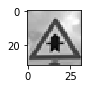

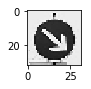

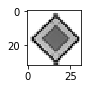

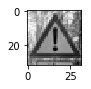

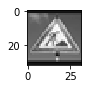

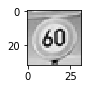

In [17]:
#I think my training data is not that great, probably could use better methods to augment it,
#since for a couple different model achitectures I would have high accuracy on validattion and test 96/97 valid and 94/95 ttest
#but I would get 0 on the images below and every image would have mostly the same labels in their top5 with highest probability being around .24 

topClasses=tf.nn.top_k(tf.nn.softmax(logits),k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    topC = sess.run(topClasses, feed_dict={x: imgs, y: lbls,keepProb: 1.0})#Do not want dropout for evaluation

    numCorr=0
    for i in range(len(imgs)):
        plt.figure(figsize=(1,1))
        plt.imshow(imgs[i].squeeze(),cmap='gray')
        print('Actual label:',end='')
        print(lbls[i])
        
        print("\tProbabilities:",end='')
        print(topC[0][i])
        
        print("\tSign IDs:",end='')
        print(topC[1][i])
        
        #preds.append(topC)#save top 5 predictions, in case want them later
        if topC[1][i][0]==lbls[i]:
            numCorr+=1

    acc=numCorr/len(imgs)
    
    print("Accuracy = {:.3f}".format(acc))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")